In [52]:
from gensim.models import Word2Vec
import matplotlib.pyplot as plt
import codecs
from konlpy.tag import Twitter
from konlpy.tag import Okt
from gensim.models import word2vec
from konlpy.utils import pprint
from sklearn.manifold import TSNE
import numpy as np

In [2]:
sentences = [
                ['this', 'is', 'a',   'good',      'product'],
                ['it',   'is', 'a',   'excellent', 'product'],
                ['it',   'is', 'a',   'bad',       'product'],
                ['that', 'is', 'the', 'worst',     'product']
            ]

# 문장을 이용하여 단어와 벡터를 생성한다.
model = Word2Vec(sentences, size=5, window=3, min_count=1)

In [3]:
# 단어벡터를 구한다.
word_vectors = model.wv
print(word_vectors)

In [4]:
print(word_vectors["this"])
print(word_vectors["the"])

[ 0.09953845  0.01279317  0.02184334 -0.07571183 -0.05901404]
[ 0.00975819  0.03784186 -0.05560508  0.06141206 -0.07297619]


In [5]:
vocabs = word_vectors.vocab.keys()
print(vocabs)

dict_keys(['this', 'is', 'a', 'good', 'product', 'it', 'excellent', 'bad', 'that', 'the', 'worst'])


In [6]:
word_vectors_list = [word_vectors[v] for v in vocabs]
print(word_vectors_list)

[array([ 0.09953845,  0.01279317,  0.02184334, -0.07571183, -0.05901404],
      dtype=float32), array([-0.01238685, -0.03268021,  0.05405886, -0.09343708, -0.00935175],
      dtype=float32), array([ 0.09482545, -0.00843781,  0.0084598 , -0.07621323, -0.04889252],
      dtype=float32), array([ 0.04630049,  0.08231949, -0.04287184,  0.03942706, -0.07782292],
      dtype=float32), array([-0.04525888,  0.09389763, -0.02650124,  0.08893128, -0.07002317],
      dtype=float32), array([ 0.05736662, -0.01210064,  0.00149961,  0.04841078,  0.08656961],
      dtype=float32), array([-0.01347671,  0.07884201,  0.0491432 , -0.03623179, -0.05788369],
      dtype=float32), array([ 0.07954287, -0.01926265,  0.03233857,  0.0870996 ,  0.06889183],
      dtype=float32), array([-0.09979971,  0.03923905,  0.07233156, -0.00420231, -0.05230707],
      dtype=float32), array([ 0.00975819,  0.03784186, -0.05560508,  0.06141206, -0.07297619],
      dtype=float32), array([ 0.08644276,  0.08556297,  0.08179906, -0.

In [7]:
model.wv.similarity(w1='this',w2='the')

-0.00620535

In [8]:
model.wv.most_similar('it')

[('bad', 0.9202791452407837),
 ('worst', -0.13937042653560638),
 ('a', -0.15606151521205902),
 ('this', -0.19667452573776245),
 ('good', -0.20699721574783325),
 ('the', -0.24646224081516266),
 ('product', -0.30730730295181274),
 ('is', -0.4243580102920532),
 ('excellent', -0.6293504238128662),
 ('that', -0.672888457775116)]

In [9]:
#파일 읽기 함수. 첫줄 헤더를 제외하고 한 줄씩 읽어서 data 에 담아서 리턴 한다.
def read_data(filename):
    with open(filename, encoding='utf-8', mode='r') as f:
        data = [line.split('\t') for line in f.read().splitlines()]
        data = data[1:]   # header 제외
    return data

ratings_train = read_data('ratings_train.txt')

In [10]:
print(ratings_train[0])

['9976970', '아 더빙.. 진짜 짜증나네요 목소리', '0']


In [11]:
okt = Okt()

def tokens(doc):
    return ['/'.join(t) for t in okt.pos(doc, norm=True, stem=True)]

In [12]:
tokens('아 더빙.. 진짜 짜증나네요 목소리')

['아/Exclamation',
 '더빙/Noun',
 '../Punctuation',
 '진짜/Noun',
 '짜증나다/Adjective',
 '목소리/Noun']

In [13]:
#파일중에서 영화 리뷰 데이터만 담기
docs = []
for row in ratings_train:
    docs.append(row[1])
print(docs[:10])

['아 더빙.. 진짜 짜증나네요 목소리', '흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나', '너무재밓었다그래서보는것을추천한다', '교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정', '사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 던스트가 너무나도 이뻐보였다', '막 걸음마 뗀 3세부터 초등학교 1학년생인 8살용영화.ㅋㅋㅋ...별반개도 아까움.', '원작의 긴장감을 제대로 살려내지못했다.', '별 반개도 아깝다 욕나온다 이응경 길용우 연기생활이몇년인지..정말 발로해도 그것보단 낫겟다 납치.감금만반복반복..이드라마는 가족도없다 연기못하는사람만모엿네', '액션이 없는데도 재미 있는 몇안되는 영화', '왜케 평점이 낮은건데? 꽤 볼만한데.. 헐리우드식 화려함에만 너무 길들여져 있나?']


In [14]:
data = [tokens(d) for d in  docs]
print(data[:10])

[['아/Exclamation', '더빙/Noun', '../Punctuation', '진짜/Noun', '짜증나다/Adjective', '목소리/Noun'], ['흠/Noun', '.../Punctuation', '포스터/Noun', '보고/Noun', '초딩/Noun', '영화/Noun', '줄/Noun', '..../Punctuation', '오버/Noun', '연기/Noun', '조차/Josa', '가볍다/Adjective', '않다/Verb'], ['너/Modifier', '무재/Noun', '밓었/Noun', '다그/Noun', '래서/Noun', '보다/Verb', '추천/Noun', '한/Josa', '다/Adverb'], ['교도소/Noun', '이야기/Noun', '구먼/Noun', '../Punctuation', '솔직하다/Adjective', '재미/Noun', '는/Josa', '없다/Adjective', '../Punctuation', '평점/Noun', '조정/Noun'], ['사이/Modifier', '몬페/Noun', '그/Determiner', '의/Noun', '익살스럽다/Adjective', '연기/Noun', '가/Josa', '돋보이다/Verb', '영화/Noun', '!/Punctuation', '스파이더맨/Noun', '에서/Josa', '늙다/Verb', '보이다/Verb', '하다/Verb', '커스틴/Noun', '던스트/Noun', '가/Josa', '너무나도/Adverb', '이쁘다/Adjective', '보이다/Verb'], ['막/Noun', '걸음/Noun', '마/Noun', '떼다/Verb', '3/Number', '세/Noun', '부터/Josa', '초등학교/Noun', '1/Number', '학년/Noun', '생인/Noun', '8/Number', '살다/Verb', '영화/Noun', './Punctuation', 'ㅋㅋㅋ/KoreanParticle', '.../Punctuation', '별

In [15]:
w2v_model = word2vec.Word2Vec(data,size =100, window=3, min_count=2)

In [16]:
w2v_model.save('naver.model')

In [17]:
vocabs = w2v_model.wv.vocab.keys()
print(len(vocabs))

27477


In [18]:
print(w2v_model.wv.most_similar(positive=tokens('남자 여배우'), negative=tokens('배우'), topn=5))

[('여자/Noun', 0.815803050994873), ('여주/Noun', 0.7381370067596436), ('아빠/Noun', 0.7048577070236206), ('여자애/Noun', 0.7016197443008423), ('몸매/Noun', 0.6979788541793823)]


In [32]:
print(w2v_model.wv.most_similar(positive=tokens('짜증나'),topn=10))

[('답답하다/Adjective', 0.7746868133544922), ('어이없다/Adjective', 0.7245328426361084), ('지겹다/Adjective', 0.7230473756790161), ('오글거리다/Verb', 0.7214547395706177), ('재미없다/Adjective', 0.7210409045219421), ('화나다/Verb', 0.7144299745559692), ('빡치다/Adjective', 0.7033597230911255), ('졸리다/Verb', 0.7008399367332458), ('역겹다/Adjective', 0.6815516948699951), ('이상하다/Adjective', 0.6624871492385864)]


In [20]:
vocab = list(w2v_model.wv.vocab)
X = w2v_model[vocab]
tsne = TSNE(n_components=2) ## 고차원 데이터를 저차원으로 내려서 시각화해준다.
X_tsne = tsne.fit_transform(X[:300,:])# n**2 의 속도를 가지고 있기때문에 많으면 힘들다

C:\Users\Student\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


In [21]:
print(X_tsne.shape)
print(X_tsne)

(300, 2)
[[-3.16323996e+00  6.73234701e+00]
 [ 7.73720264e+00 -4.02564478e+00]
 [ 7.02186346e+00  1.16638098e+01]
 [ 4.47930765e+00 -1.40811510e+01]
 [-1.96423900e+00  1.17269478e+01]
 [-9.90015888e+00 -7.90586996e+00]
 [-3.50746846e+00  6.03858042e+00]
 [ 6.97614288e+00  1.15504580e+01]
 [-2.15252852e+00 -2.78975296e+00]
 [ 9.54110050e+00  2.34174824e+00]
 [-1.04935846e+01  5.05515194e+00]
 [ 9.73489285e+00 -1.10610313e+01]
 [ 1.27654467e+01 -2.93264246e+00]
 [ 6.94697237e+00  1.14215612e+01]
 [ 7.86145091e-01 -6.70417595e+00]
 [-9.88156986e+00 -8.77350140e+00]
 [ 2.48751545e+00 -3.47998810e+00]
 [ 1.23412061e+00 -5.36804056e+00]
 [ 1.87572777e+00 -1.13541756e+01]
 [-7.81368542e+00  1.34924889e+00]
 [-5.65564111e-02  1.62697363e+00]
 [-1.78351510e+00 -1.21970105e+00]
 [-2.10740113e+00  2.06101418e+00]
 [ 9.13685322e+00  2.87424564e+00]
 [-1.38282652e+01 -1.04191961e+01]
 [-3.62099266e+00 -1.61286583e+01]
 [ 5.16483212e+00 -3.78265120e-02]
 [-2.14189410e+00 -1.37685001e-01]
 [ 8.042283

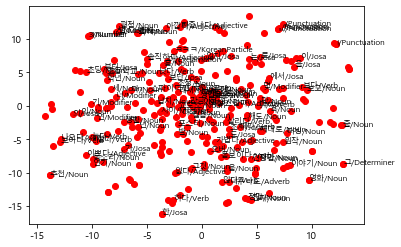

In [26]:
from matplotlib import font_manager, rc
import matplotlib as mpl
import matplotlib.pyplot as plt
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name) # 한글 폰트


mpl.rcParams['axes.unicode_minus'] = False # -1가 깨지지 않게

plt.scatter(X_tsne[:,0], X_tsne[:,1], c='red')


words = vocab[:100]    
for i, word in enumerate(words):
    plt.text(X_tsne[i,0], X_tsne[i,1 ], word, fontsize=8) 
plt.savefig('out.png', dpi=200)


<img src=out.png?2 >

C:\Users\Student\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Student\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys


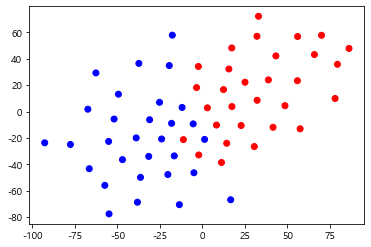

In [72]:
group1 = w2v_model.wv.most_similar(tokens('예쁘다'), topn=30)
group1 = [w for ( w,  s )  in  group1 ]
X1 = w2v_model[group1]

group2 = w2v_model.wv.most_similar(tokens('못생겼다'), topn=30)
group2 = [w for ( w,  s )  in  group2 ]
X2 = w2v_model[group2]

X_tsne =tsne.fit_transform(np.vstack([X1, X2]))

label = np.hstack([0*np.ones(30), np.ones(30)  ])
c = [ 'red'  if l == 0  else 'blue'  for l in label ]


plt.scatter(X_tsne[:,0], X_tsne[:,1], color=c)


## 값을 할때 마다 그래프가 계속 바뀐다.
#2차원으로 값을 줄일때마다 값이 바뀜
# 범인 X_tsne 초기값이 랜덤하게 바뀌기 때문에 fit 값으로 주지 않고
# 시각화 할경우에만 사용한다.